In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
!pip install --upgrade seaborn
import seaborn as sns

from datetime import datetime


import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action="ignore", category=pd.core.common.SettingWithCopyWarning)

pd.set_option('display.max_rows', 160)
pd.set_option('display.max_columns', 160)

In [2]:
train = pd.read_csv("train_LZdllcl.csv")
test = pd.read_csv("test_2umaH9m.csv")

train_id = train.employee_id
test_id = test.employee_id

print("Train set: ", train.shape)
print("Test set: ", test.shape)

train.info()

Train set:  (54808, 14)
Test set:  (23490, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8)

In [3]:
for col in train.columns:
    print("For column: ", col + "\n")
    print(train[col].value_counts(), "\n")

For column:  employee_id

2047     1
19228    1
4887     1
6934     1
789      1
        ..
71176    1
44543    1
48637    1
36347    1
4098     1
Name: employee_id, Length: 54808, dtype: int64 

For column:  department

Sales & Marketing    16840
Operations           11348
Technology            7138
Procurement           7138
Analytics             5352
Finance               2536
HR                    2418
Legal                 1039
R&D                    999
Name: department, dtype: int64 

For column:  region

region_2     12343
region_22     6428
region_7      4843
region_15     2808
region_13     2648
region_26     2260
region_31     1935
region_4      1703
region_27     1659
region_16     1465
region_28     1318
region_11     1315
region_23     1175
region_29      994
region_32      945
region_19      874
region_20      850
region_14      827
region_25      819
region_17      796
region_5       766
region_6       690
region_30      657
region_8       655
region_10      648
region_

In [4]:
cat_cols = ["department", "region", "education", "gender", "recruitment_channel", "KPIs_met >80%", "awards_won?"]

num_cols = ["no_of_trainings", "age", "length_of_service", "avg_training_score"]

ord_cols = ["previous_year_rating"]

In [5]:
print("balance of target:")
(train.is_promoted.value_counts() / train.shape[0]).round(3)

balance of target:


0    0.915
1    0.085
Name: is_promoted, dtype: float64

In [6]:
df = pd.concat([train, test])
df_raw = df.copy()

In [7]:
def missing(df):
    miss = df.isnull().sum()
    return print(miss[miss > 0])

In [8]:
missing(df)

education                3443
previous_year_rating     5936
is_promoted             23490
dtype: int64


In [9]:
df.loc[df.previous_year_rating.isnull() & (df.length_of_service == 1), "previous_year_rating"] = 0

In [10]:
missing(df)

education       3443
is_promoted    23490
dtype: int64


In [11]:
def count_percentage(df, col):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(22, 9))
    sns.countplot(col, data=df, hue = "is_promoted", ax = ax1).set_title("Counts For Feature:\n" + col)

    df_temp = df.groupby(col)["is_promoted"].value_counts(normalize=True).\
    rename("percentage").\
    reset_index()

    fig = sns.barplot(x=col, y="percentage", hue="is_promoted", data=df_temp, ax = ax2)
    fig.set_ylim(0,1)
    for p in fig.patches:
        txt = str(p.get_height().round(2)) + '%'
        txt_x = p.get_x() 
        txt_y = p.get_height()
        fig.text(txt_x + 0.125, txt_y + 0.02,txt, fontsize=12)

    ax2.set_title("Percentages For Feature: \n" + col)

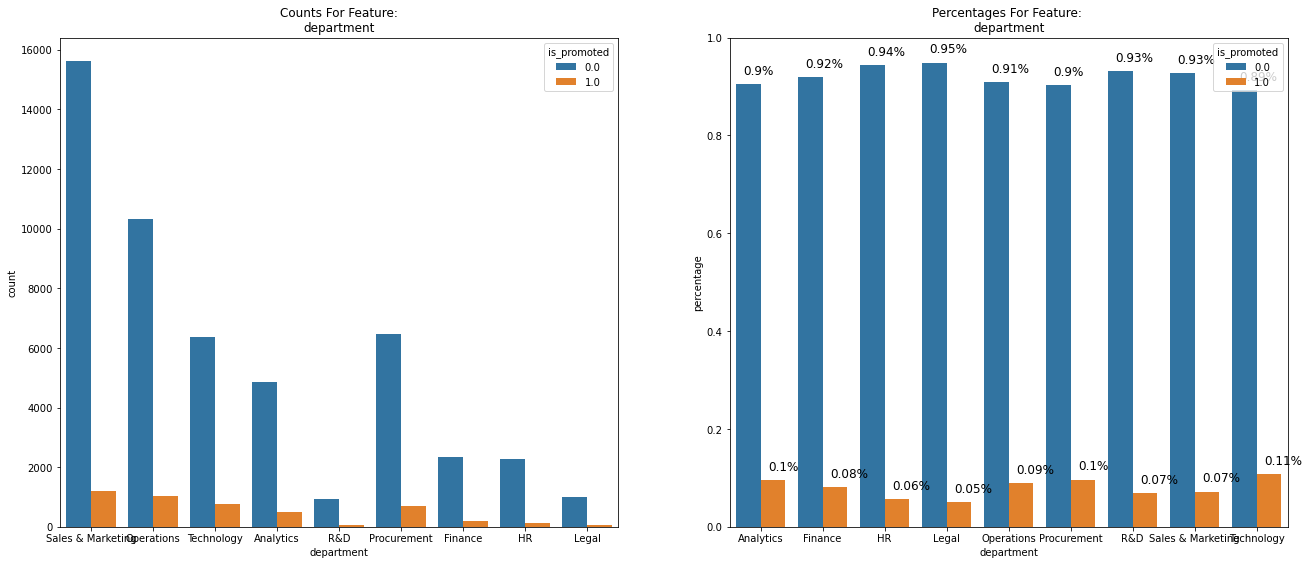

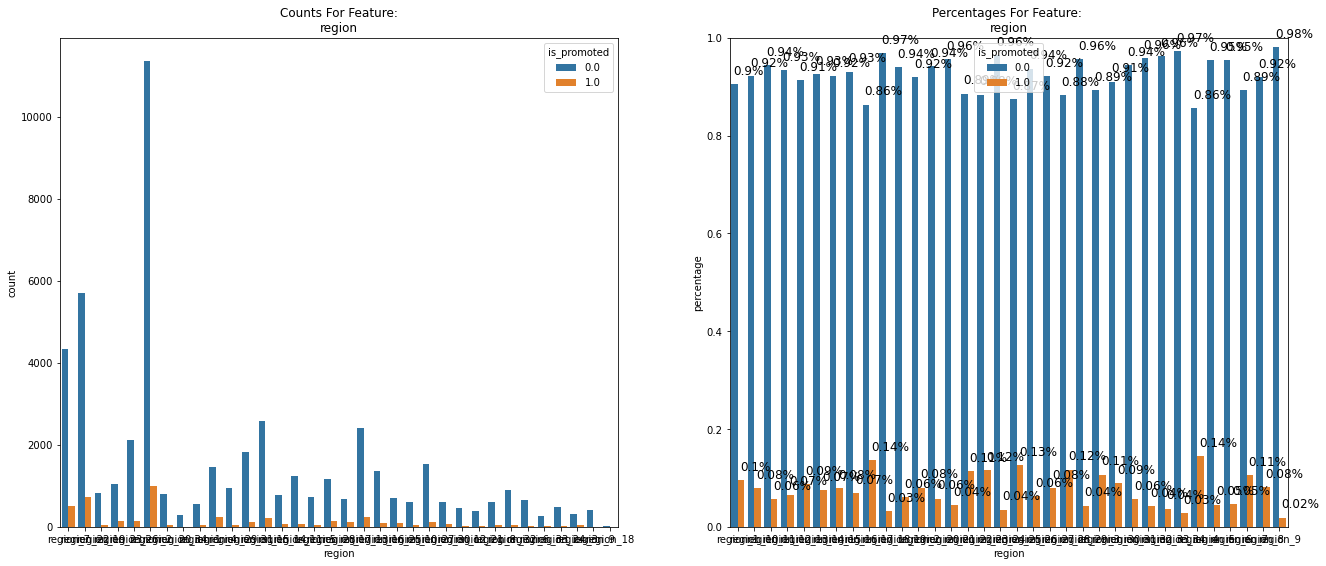

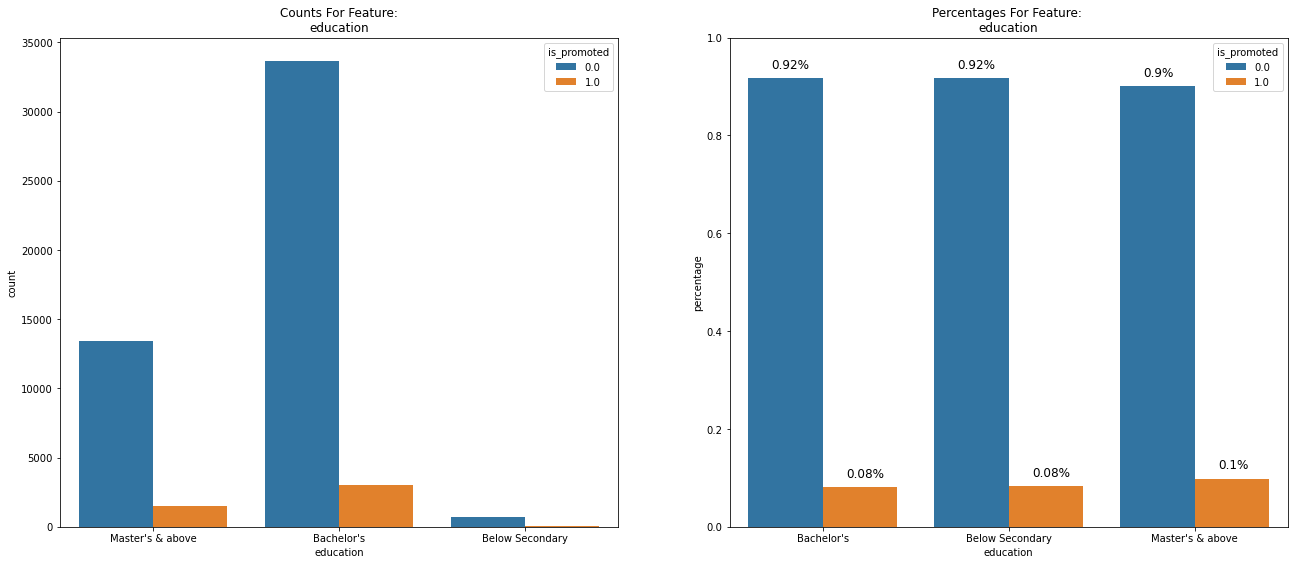

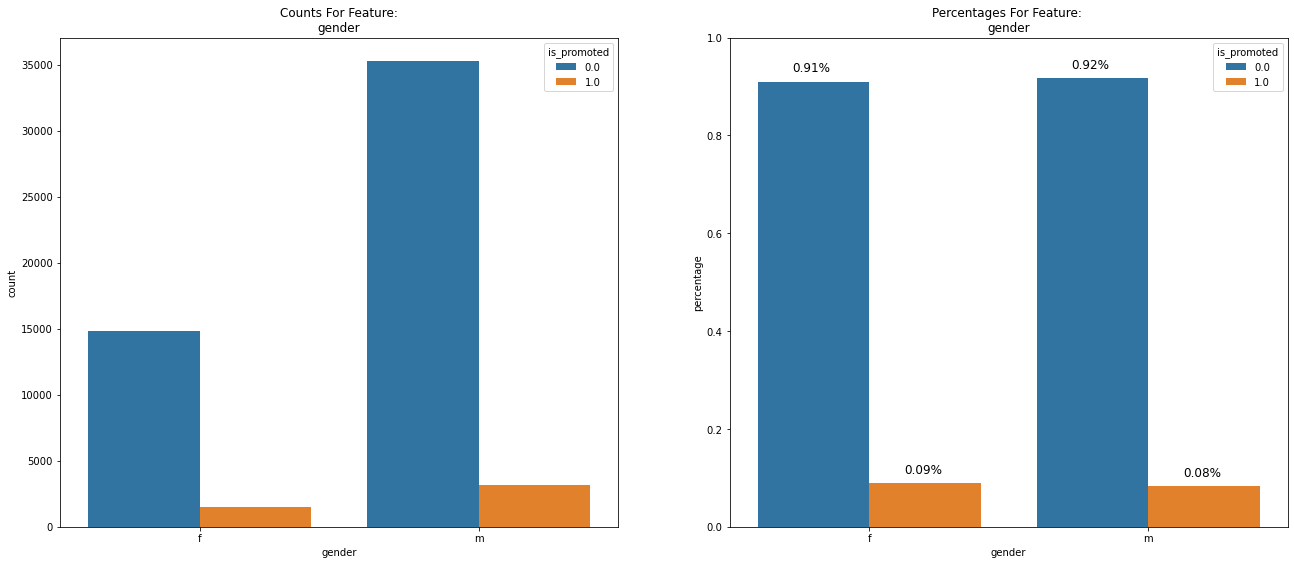

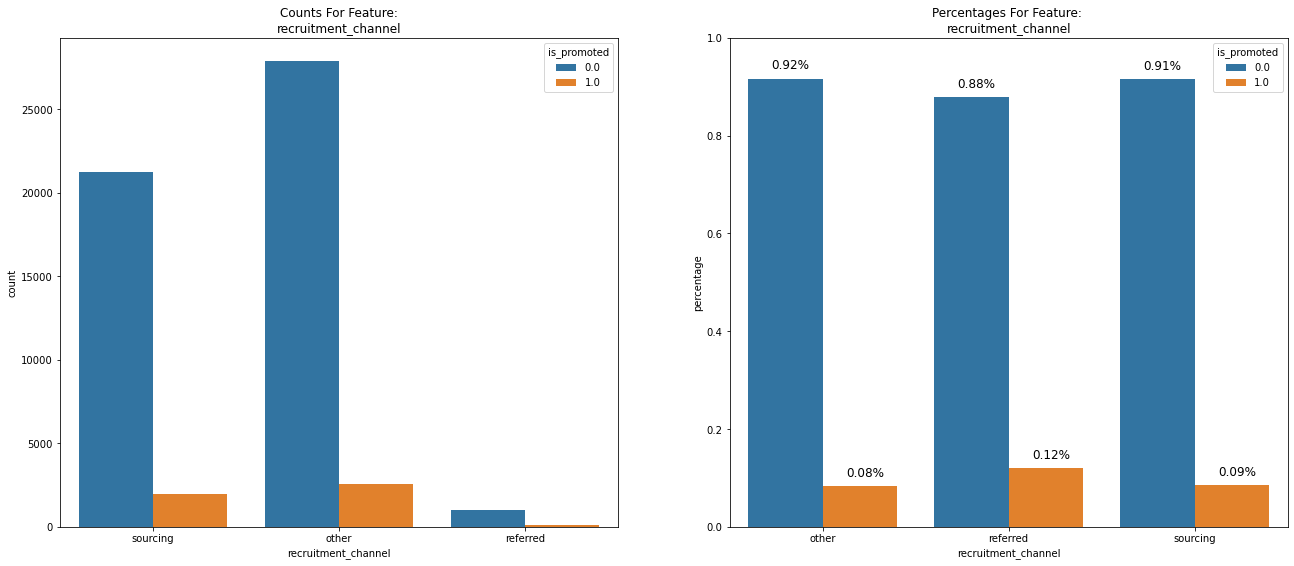

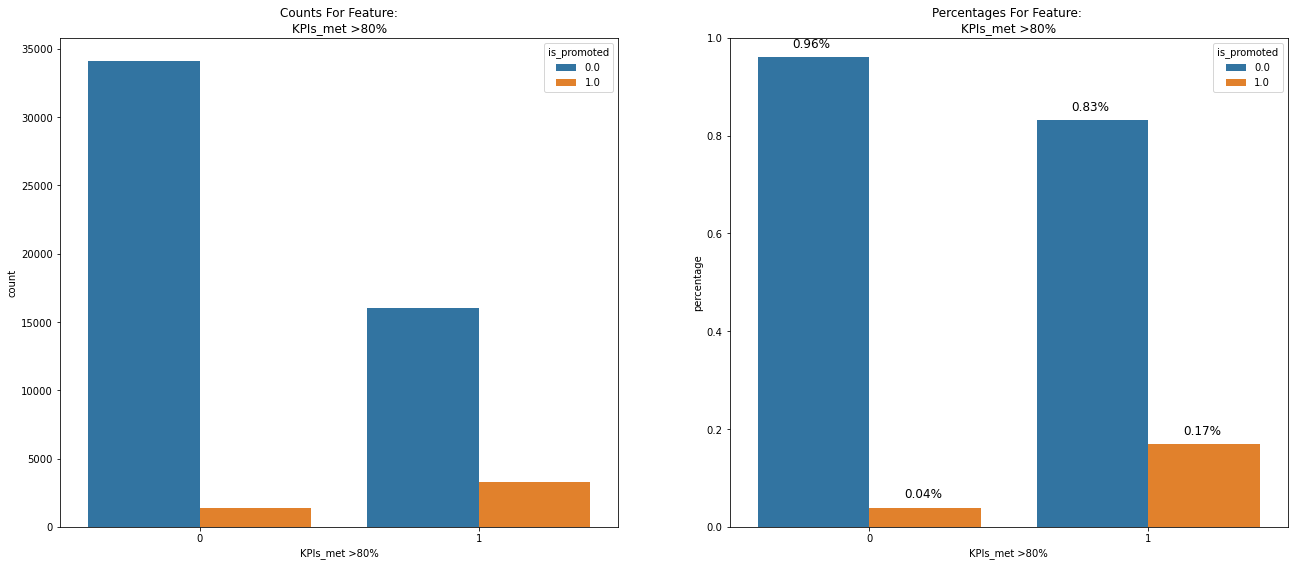

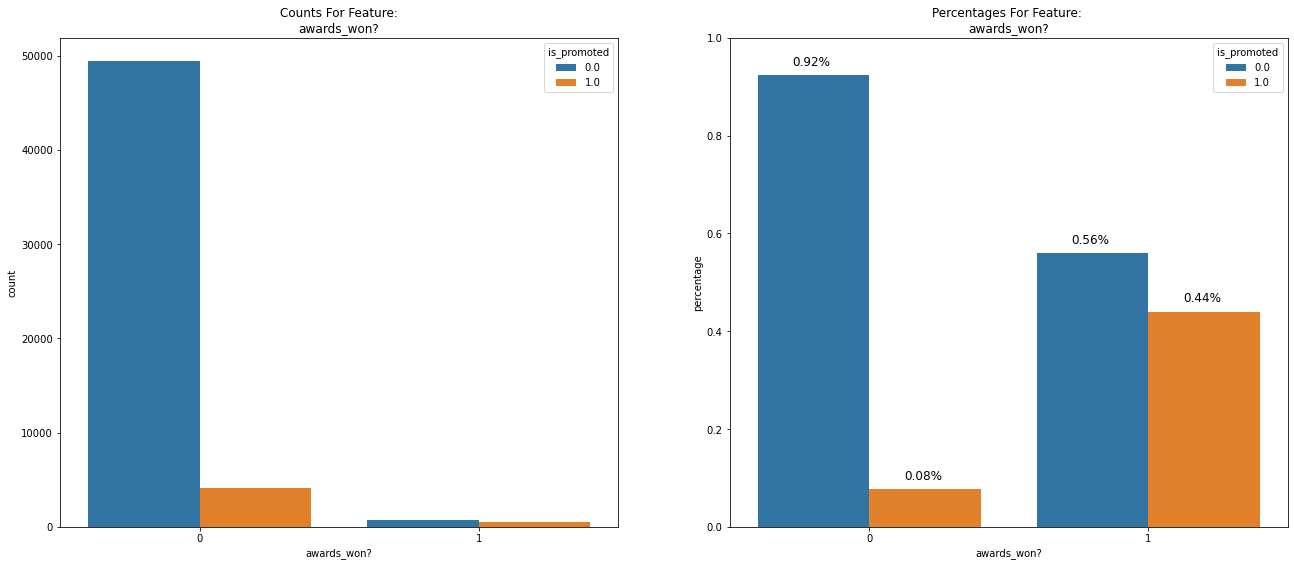

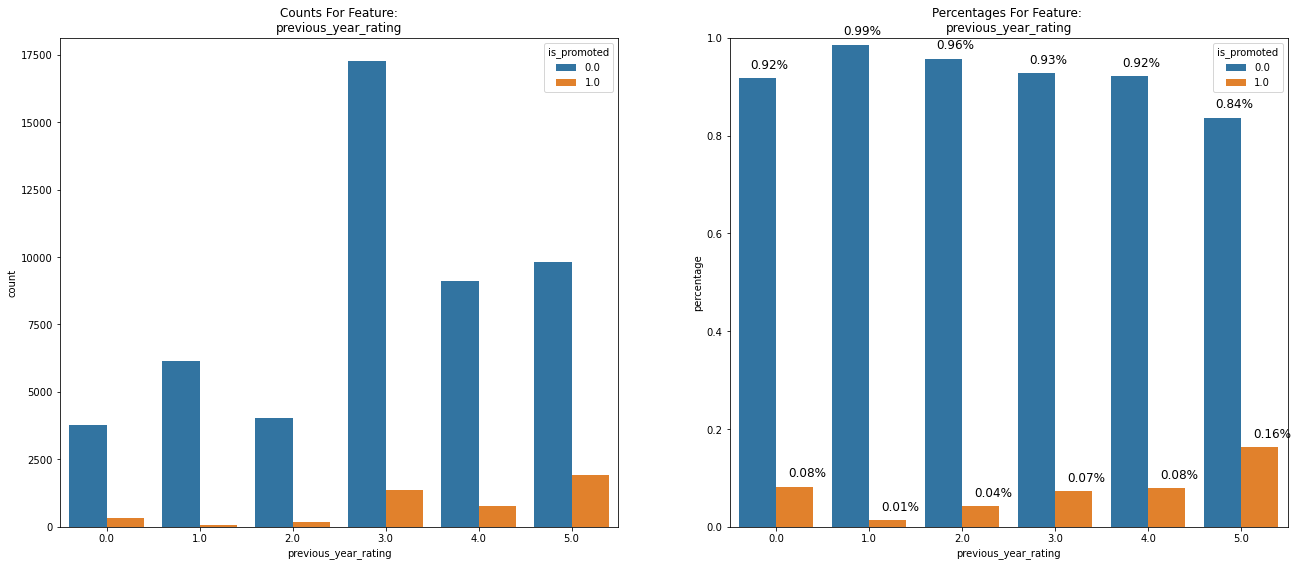

In [12]:
for col in cat_cols + ord_cols:
    count_percentage(df, col)

In [13]:
(df.education.value_counts() / df.education.value_counts().sum()).round(3)

Bachelor's          0.698
Master's & above    0.286
Below Secondary     0.016
Name: education, dtype: float64

In [14]:
freq_df = df.groupby(["department", "gender", "recruitment_channel"])["education"].value_counts().unstack()
pct_df = freq_df.divide(freq_df.sum(axis=1), axis=0)

pct_df["new_val"] = ""
for i in range(pct_df.shape[0]):
    if (pct_df.values[i][2] >= 0.30) & (pct_df.values[i][0] < 0.69):
        pct_df["new_val"][i] = "Master's & above"
    elif (pct_df.values[i][0] >= 0.70) & (pct_df.values[i][2] <= 0.28):
        pct_df["new_val"][i] = "Bachelor's"
    elif (pct_df.values[i][0] >= 0.70):
        pct_df["new_val"][i] = "Bachelor's"
    else:
         pct_df["new_val"][i] = "Below Secondary"

pct_df

education                                     Bachelor's  Below Secondary  \
department        gender recruitment_channel                                
Analytics         f      other                  0.892421              NaN   
                         referred               1.000000              NaN   
                         sourcing               0.922535              NaN   
                  m      other                  0.770424              NaN   
                         referred               1.000000              NaN   
                         sourcing               0.782703              NaN   
Finance           f      other                  0.759777         0.044693   
                         sourcing               0.750000         0.060000   
                  m      other                  0.744569         0.038841   
                         referred               1.000000              NaN   
                         sourcing               0.751123         0.043127   
HR                f      other                  0.632704         0.045283   
                         referred               0.641026         0.128205   
                         sourcing               0.622378         0.052448   
                  m      other                  0.642478         0.053097   
                         referred               0.753086         0.111111   
                         sourcing               0.641698         0.051186   
Legal             f      other                  0.794643         0.098214   
                         sourcing               0.785714         0.035714   
                  m      other                  0.768480         0.068340   
                         referred               1.000000              NaN   
                         sourcing               0.774254         0.069030   
Operations        f      other                  0.682071         0.012249   
                         referred               0.682243              NaN   
                         sourcing               0.708569         0.013456   
                  m      other                  0.706714         0.018453   
                         referred               0.644144              NaN   
                         sourcing               0.710999         0.018458   
Procurement       f      other                  0.609080         0.018469   
                         referred               0.589744              NaN   
                         sourcing               0.609858         0.021500   
                  m      other                  0.631920         0.018776   
                         referred               0.677419              NaN   
                         sourcing               0.612724         0.023057   
R&D               f      other                  0.615385              NaN   
                         sourcing               0.533333              NaN   
                  m      other                  0.537293              NaN   
                         referred               0.592593              NaN   
                         sourcing               0.558304              NaN   
Sales & Marketing f      other                  0.702331              NaN   
                         referred               1.000000              NaN   
                         sourcing               0.717309              NaN   
                  m      other                  0.724401              NaN   
                         referred               0.893082              NaN   
                         sourcing               0.730578              NaN   
Technology        f      other                  0.657737         0.027252   
                         referred               0.740000         0.066667   
                         sourcing               0.652638         0.023241   
                  m      other                  0.648722         0.024662   
                         referred               0.810811         0.069069

In [15]:
for i in range(pct_df.shape[0]):

    df.loc[(df.education.isnull()) & (df.department == pct_df.index[i][0]) & (df.gender == pct_df.index[i][1]) & \
           (df.recruitment_channel == pct_df.index[i][2]), "education"] = pct_df.new_val.values[i]

In [16]:
missing(df)

is_promoted    23490
dtype: int64


In [17]:
num_cols

['no_of_trainings', 'age', 'length_of_service', 'avg_training_score']

In [18]:
df_fe = df.copy()

In [19]:
df_fe["is_firstyear"] = df_fe["length_of_service"].apply(lambda x: 1 if x==1 else 0)

In [20]:
df_fe["starting_age"] = df_fe["age"] - df_fe["length_of_service"]

In [21]:
df_fe["total_success"] = df_fe["avg_training_score"] + df_fe["KPIs_met >80%"]*100 + df_fe["awards_won?"]* 100 + df_fe["previous_year_rating"]*20

In [22]:
df_fe.groupby(["region", "department"])["total_success"].mean()

region    department       
region_1  Analytics            203.126214
          Finance              154.555556
          HR                   196.333333
          Legal                123.000000
          Operations           176.640000
                                  ...    
region_9  Operations           136.750000
          Procurement          133.222222
          R&D                  242.000000
          Sales & Marketing    112.443820
          Technology           154.700000
Name: total_success, Length: 293, dtype: float64

In [23]:
rd1 = df_fe.groupby(["region", "department"])["employee_id"].count()
rd2 = df_fe.groupby(["region", "department"])["age"].mean()
rd3 = df_fe.groupby(["region", "department"])["avg_training_score"].mean()
rd4 = df_fe.groupby(["region", "department"])["total_success"].mean()
rd5 = df_fe.groupby(["region", "department"])["previous_year_rating"].mean()
rd6 = df_fe.groupby(["region", "department"])["length_of_service"].mean()
rd7 = df_fe.groupby(["region", "department"])["is_firstyear"].sum()


for i in range(rd1.shape[0]):
    region = rd1.index[i][0]
    department = rd1.index[i][1]

    df_fe.loc[(df_fe.region == region) & (df_fe.department == department), "employee_per_department&region"] = rd1[i]
    df_fe.loc[(df_fe.region == region) & (df_fe.department == department), "avg_age_for_department&region"] = rd2[i]
    df_fe.loc[(df_fe.region == region) & (df_fe.department == department), "avg_score_for_department&region"] = rd3[i]
    df_fe.loc[(df_fe.region == region) & (df_fe.department == department), "avg_succes_department&region"] = rd4[i]
    df_fe.loc[(df_fe.region == region) & (df_fe.department == department), "avg_prev_year_rating_department&region"] = rd5[i]
    df_fe.loc[(df_fe.region == region) & (df_fe.department == department), "avg_len_of_service_department&region"] = rd6[i]
    df_fe.loc[(df_fe.region == region) & (df_fe.department == department), "total_rookie_for_department&region"] = rd7[i]    

In [24]:
df_fe["is_young_in_dep_reg"] = np.where((df_fe.age <= df_fe["avg_age_for_department&region"]), 0, 1)
df_fe["better_score_in_dep_reg"] = np.where((df_fe["avg_score_for_department&region"] <= df_fe["avg_training_score"]), 1, 0)
df_fe["better_success_in_dep_reg"] = np.where((df_fe["avg_succes_department&region"] <= df_fe["total_success"]), 1, 0)
df_fe["better_prev_year_rating_in_dep_reg"] = np.where((df_fe["avg_prev_year_rating_department&region"] <= df_fe["previous_year_rating"]), 1, 0)
df_fe["longer_len_of_service_rating_in_dep_reg"] = np.where((df_fe["avg_len_of_service_department&region"] <= df_fe["length_of_service"]), 1, 0)

In [25]:
d1 = df_fe.groupby("department")["employee_id"].count()
d2 = df_fe.groupby("department")["age"].mean()
d3 = df_fe.groupby("department")["avg_training_score"].mean()
d4 = df_fe.groupby("department")["total_success"].mean()
d5 = df_fe.groupby("department")["previous_year_rating"].mean()
d6 = df_fe.groupby("department")["length_of_service"].mean()
d7 = df_fe.groupby("department")["is_firstyear"].sum()


for i in range(d1.shape[0]):
    department = d1.index[i]

    df_fe.loc[(df_fe.department == department), "employee_per_department"] = d1[i]
    df_fe.loc[(df_fe.department == department), "avg_age_for_department"] = d2[i]
    df_fe.loc[(df_fe.department == department), "avg_score_for_department"] = d3[i]
    df_fe.loc[(df_fe.department == department), "avg_succes_department"] = d4[i]
    df_fe.loc[(df_fe.department == department), "avg_prev_year_rating_department"] = d5[i]
    df_fe.loc[(df_fe.department == department), "avg_len_of_service_department"] = d6[i]
    df_fe.loc[(df_fe.department == department), "total_rookie_for_department"] = d7[i]  

In [26]:
d1

department
Analytics             7671
Finance               3627
HR                    3503
Legal                 1484
Operations           16112
Procurement          10158
R&D                   1439
Sales & Marketing    24155
Technology           10149
Name: employee_id, dtype: int64

In [27]:
df_fe["is_young_in_dep"] = np.where((df_fe.age <= df_fe["avg_age_for_department"]), 0, 1)
df_fe["better_score_in_dep"] = np.where((df_fe["avg_score_for_department"] <= df_fe["avg_training_score"]), 1, 0)
df_fe["better_success_in_dep"] = np.where((df_fe["avg_succes_department"] <= df_fe["total_success"]), 1, 0)
df_fe["better_prev_year_rating_in_dep"] = np.where((df_fe["avg_prev_year_rating_department"] <= df_fe["previous_year_rating"]), 1, 0)
df_fe["longer_len_of_service_rating_in_dep"] = np.where((df_fe["avg_len_of_service_department"] <= df_fe["length_of_service"]), 1, 0)

In [28]:
df_fe["education"] = df_fe["education"].map({"Below Secondary": 1, "Bachelor's": 2, "Master's & above":3})

In [29]:
df_fe["total_training_score"] = df_fe["no_of_trainings"] * df_fe["avg_training_score"]

In [30]:
def calc_smooth_mean(df, by, on, m):
    # Compute the global mean
    mean = df[on].mean()

    # Compute the number of values and the mean of each group
    agg = df.groupby(by)[on].agg(['count', 'mean'])
    counts = agg['count']
    means = agg['mean']

    # Compute the "smoothed" means
    smooth = (counts * means + m * mean) / (counts + m)

    # Replace each value by the according smoothed mean
    return df[by].map(smooth)

df_fe["region"] = calc_smooth_mean(df_fe, "region", "is_promoted", 300)
df_fe["department"] = calc_smooth_mean(df_fe, "department", "is_promoted", 300)

In [31]:
from sklearn.preprocessing import RobustScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, f1_score, roc_auc_score
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV, StratifiedKFold, train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

!pip install --upgrade lightgbm
import lightgbm as lgb
from skopt import BayesSearchCV

  Attempting uninstall: lightgbm
    Found existing installation: lightgbm 3.1.1
    Uninstalling lightgbm-3.1.1:
      Successfully uninstalled lightgbm-3.1.1


In [32]:
cat_cols = ["department", "region", "gender", "recruitment_channel"]

In [33]:
def prepare_data(df, cat_cols):
    dummies = pd.get_dummies(df[cat_cols], drop_first = True)
    fin = pd.concat([df, dummies], axis=1).drop(cat_cols, axis = 1)
    
    train = fin[fin.is_promoted.notnull()]
    test = fin[fin.is_promoted.isnull()]
    
    return train, test

In [34]:
train, test = prepare_data(df_fe, ["gender", "recruitment_channel"])

In [35]:
target = "is_promoted"
predictors = [x for x in train.columns if x not in ["employee_id", "is_promoted"]]

In [36]:
from sklearn.metrics import f1_score
from sklearn.metrics import make_scorer

f1_scorer = make_scorer(f1_score)

In [37]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=35)

In [38]:
X_train, X_test, y_train, y_test = train_test_split(train[predictors], train[target], test_size=0.15, stratify=train[target], random_state=35)

In [39]:
X_train

,department,region,education,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_firstyear,starting_age,total_success,employee_per_department&region,avg_age_for_department&region,avg_score_for_department&region,avg_succes_department&region,avg_prev_year_rating_department&region,avg_len_of_service_department&region,total_rookie_for_department&region,is_young_in_dep_reg,better_score_in_dep_reg,better_success_in_dep_reg,better_prev_year_rating_in_dep_reg,longer_len_of_service_rating_in_dep_reg,employee_per_department,avg_age_for_department,avg_score_for_department,avg_succes_department,avg_prev_year_rating_department,avg_len_of_service_department,total_rookie_for_department,is_young_in_dep,better_score_in_dep,better_success_in_dep,better_prev_year_rating_in_dep,longer_len_of_service_rating_in_dep,total_training_score,gender_m,recruitment_channel_referred,recruitment_channel_sourcing
29887,0.095108,0.112894,2,3,27,4.0,2,0,0,86,0,25,166.0,1592.0,30.052136,84.703518,199.653266,3.103015,4.077261,237.0,0,1,0,1,0,7671.0,32.408030,84.584278,192.030504,3.226568,4.940034,777.0,0,1,0,1,0,258,1,0,0
7297,0.095933,0.080246,3,1,37,5.0,8,0,0,86,0,29,186.0,2937.0,39.537283,70.250596,174.132108,3.079673,7.568267,189.0,0,1,1,1,1,10158.0,35.968596,70.129455,172.135755,3.091553,6.303603,666.0,1,1,1,1,1,86,0,0,1
48852,0.106689,0.080246,2,1,24,0.0,1,0,0,82,1,23,82.0,2526.0,38.758116,79.746239,175.565717,2.932304,7.306809,200.0,0,1,0,0,0,10149.0,34.887378,79.908464,175.346438,2.910632,5.895458,881.0,0,1,0,0,0,82,0,0,0
50941,0.095933,0.122766,3,1,27,3.0,5,0,0,68,0,22,128.0,527.0,38.447818,70.368121,176.667932,3.246679,7.102467,22.0,0,0,0,0,0,10158.0,35.968596,70.129455,172.135755,3.091553,6.303603,666.0,0,0,0,0,0,68,0,0,0
17733,0.072261,0.110971,2,1,24,4.0,3,1,0,50,0,21,230.0,930.0,33.265591,50.487097,148.164516,3.082796,5.356989,69.0,0,0,1,1,0,24155.0,34.801615,50.208487,135.807328,2.830967,5.871911,2096.0,0,0,1,1,0,50,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53467,0.106689,0.077685,2,1,28,3.0,2,0,0,76,0,26,136.0,164.0,35.195122,79.695122,172.378049,3.018293,6.060976,6.0,0,0,0,0,0,10149.0,34.887378,79.908464,175.346438,2.910632,5.895458,881.0,0,0,0,1,0,76,0,0,1
6224,0.090020,0.105299,2,1,34,3.0,6,0,0,58,0,28,118.0,1228.0,36.344463,60.333876,176.783388,3.501629,6.503257,63.0,0,0,0,0,0,16112.0,36.084471,60.248572,175.058652,3.451837,6.415653,914.0,0,0,0,0,0,58,1,0,1
27937,0.106689,0.061641,2,1,37,3.0,9,0,0,78,0,28,138.0,195.0,32.538462,79.441026,167.748718,2.723077,4.953846,29.0,1,0,0,1,1,10149.0,34.887378,79.908464,175.346438,2.910632,5.895458,881.0,1,0,0,1,1,78,1,0,1
36914,0.072261,0.072267,2,1,35,2.0,4,0,0,58,0,31,98.0,816.0,35.149510,50.049020,128.382353,2.746324,6.039216,66.0,0,1,0,0,0,24155.0,34.801615,50.208487,135.807328,2.830967,5.871911,2096.0,1,1,0,0,0,58,1,0,1


In [40]:
model = lgb.LGBMClassifier(colsample_bytree=0.71, max_depth=21, metric='F1',
                            min_child_samples=98, min_child_weight=2,
                            min_split_gain=0.24748588254287762, n_estimators=5000,
                            num_leaves=25, objective='binary', random_state=35,
                            reg_alpha=4.249169887500574, reg_lambda=0.298986082777139,
                            scale_pos_weight=3, subsample=0.40050675275590797)

In [42]:
model.fit(train[predictors], train[target])
y_pred = model.predict(test[predictors])
preds = [int(round(x)) for x in y_pred]

sub=pd.DataFrame({"employee_id": test_id, "is_promoted": preds})

sub.to_csv("fin.csv", index=False)